# **Data Preparation**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tqdm import tqdm_notebook as tqdm
from collections import defaultdict
import xml.etree.ElementTree as ET
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import itertools
import cv2
import os
import re

In [3]:
os.makedirs('Data')

In [4]:
columns = ['image_id', 'caption', 'comparison', 'indication', 'findings', 'impression','height','width']
dataframe = pd.DataFrame(columns = columns)

In [5]:
for file in tqdm(os.listdir('/kaggle/input/nlmcxr/NLMCXR/Reports')):
    
    if file.endswith('.xml'):
        
        path = os.path.join('/kaggle/input/nlmcxr/NLMCXR/Reports', file)
        mytree = ET.parse(path)

        comparison = mytree.find(".//AbstractText[@Label='COMPARISON']")
        comparison = comparison.text if comparison is not None else 'N/A'

        indication = mytree.find(".//AbstractText[@Label='INDICATION']")
        indication = indication.text if indication is not None else 'N/A'

        findings = mytree.find(".//AbstractText[@Label='FINDINGS']")
        findings = findings.text if findings is not None else 'N/A'

        impression = mytree.find(".//AbstractText[@Label='IMPRESSION']")
        impression = impression.text if impression is not None else 'N/A'

        for x in mytree.findall('parentImage'):
            image_id = x.attrib['id'] + '.png'
            filename = os.path.join('/kaggle/input/nlmcxr/NLMCXR/Images', image_id)

            try:
                image = cv2.imread(filename)
                height, width, channels = image.shape
            except AttributeError:
                height, width = -1, -1

            caption = x.find('caption').text if x.find('caption') is not None else ' '

            newrow = pd.Series([image_id, caption, comparison, indication, findings, impression, height, width], index=columns)
            dataframe = pd.concat([dataframe, newrow.to_frame().T], ignore_index=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [6]:
dataframe.head(5)

,image_id,caption,comparison,indication,findings,impression,height,width
0,CXR1151_IM-0102-1001.png,Two-view chest x-XXXX XXXX at XXXX hours.,XXXX.,"XXXX, wheezing.",Frontal and lateral views of the chest demonst...,"Stable chest x-XXXX, without acute cardiopulmo...",420,512
1,CXR1151_IM-0102-2001.png,Two-view chest x-XXXX XXXX at XXXX hours.,XXXX.,"XXXX, wheezing.",Frontal and lateral views of the chest demonst...,"Stable chest x-XXXX, without acute cardiopulmo...",624,512
2,CXR3792_IM-1906-1001.png,"PA and lateral chest x-XXXX dated XXXX, XXXX a...",None.,XXXX-year-old female with XXXX x3 months..,"The lungs are clear bilaterally. Specifically,...",No acute cardiopulmonary abnormality..,509,512
3,CXR3792_IM-1906-1002.png,"PA and lateral chest x-XXXX dated XXXX, XXXX a...",None.,XXXX-year-old female with XXXX x3 months..,"The lungs are clear bilaterally. Specifically,...",No acute cardiopulmonary abnormality..,508,512
4,CXR1913_IM-0595-1001.png,PA and lateral chest radiographs.,None.,XXXX-year-old male with chest pain dyspnea.,The heart size and cardiopulmonary silhouette ...,No acute cardiopulmonary finding.,514,512


In [7]:
def absolutepath(path):
    return '/kaggle/input/nlmcxr/NLMCXR/Images/'+ path

    
dataframe['Image_path'] = dataframe['image_id'].apply(lambda x : absolutepath(x))

In [8]:
dataframe.head(5)

,image_id,caption,comparison,indication,findings,impression,height,width,Image_path
0,CXR1151_IM-0102-1001.png,Two-view chest x-XXXX XXXX at XXXX hours.,XXXX.,"XXXX, wheezing.",Frontal and lateral views of the chest demonst...,"Stable chest x-XXXX, without acute cardiopulmo...",420,512,/kaggle/input/nlmcxr/NLMCXR/Images/CXR1151_IM-...
1,CXR1151_IM-0102-2001.png,Two-view chest x-XXXX XXXX at XXXX hours.,XXXX.,"XXXX, wheezing.",Frontal and lateral views of the chest demonst...,"Stable chest x-XXXX, without acute cardiopulmo...",624,512,/kaggle/input/nlmcxr/NLMCXR/Images/CXR1151_IM-...
2,CXR3792_IM-1906-1001.png,"PA and lateral chest x-XXXX dated XXXX, XXXX a...",None.,XXXX-year-old female with XXXX x3 months..,"The lungs are clear bilaterally. Specifically,...",No acute cardiopulmonary abnormality..,509,512,/kaggle/input/nlmcxr/NLMCXR/Images/CXR3792_IM-...
3,CXR3792_IM-1906-1002.png,"PA and lateral chest x-XXXX dated XXXX, XXXX a...",None.,XXXX-year-old female with XXXX x3 months..,"The lungs are clear bilaterally. Specifically,...",No acute cardiopulmonary abnormality..,508,512,/kaggle/input/nlmcxr/NLMCXR/Images/CXR3792_IM-...
4,CXR1913_IM-0595-1001.png,PA and lateral chest radiographs.,None.,XXXX-year-old male with chest pain dyspnea.,The heart size and cardiopulmonary silhouette ...,No acute cardiopulmonary finding.,514,512,/kaggle/input/nlmcxr/NLMCXR/Images/CXR1913_IM-...


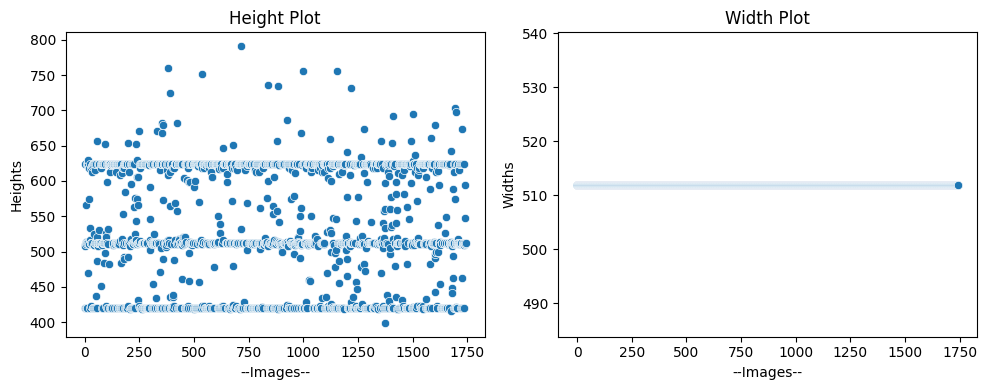

In [9]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.title('Height Plot')
plt.ylabel('Heights')
plt.xlabel('--Images--')
sns.scatterplot(x=range(len(dataframe.height.values)), y=dataframe.height.values)

plt.subplot(122)
plt.title('Width Plot')
plt.ylabel('Widths')
plt.xlabel('--Images--')
sns.scatterplot(x=range(len(dataframe.width.values)), y=dataframe.width.values)

plt.tight_layout()
plt.show()

In [10]:
data = dataframe[['image_id','findings','height','width','Image_path']]
data = data.dropna(axis=0)

In [11]:
images = {}
findings = {}

for img,fin in data[['Image_path','findings']].values:
    a = img.split('.')
    filetype = a[-1]
    a = a[0].split('-')
    a.pop(len(a)-1)
    a = ('-'.join(e for e in a))
    if a not in images.keys():
        images[a] = 1
        findings[a] = fin
    else: 
        images[a] += 1
        findings[a] = fin

In [12]:
print('Total Number of Unique IDs :', len(images.keys()))

Total Number of Unique IDs : 773


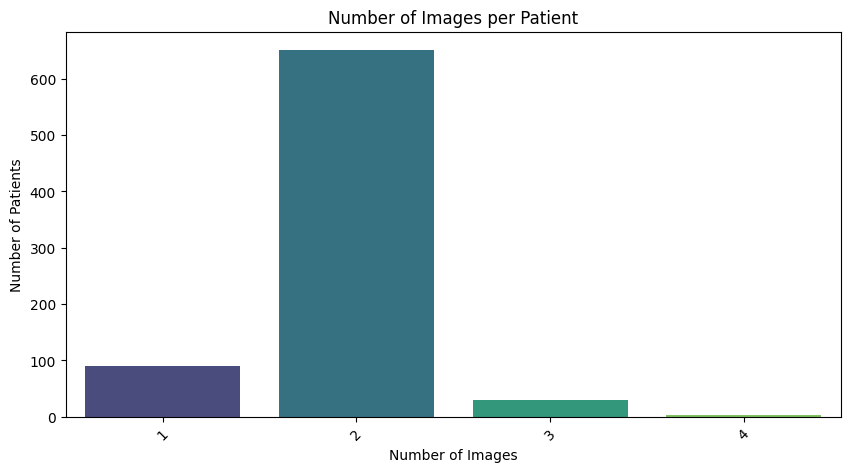

In [13]:
values = list(images.values())
uniquecounts = {v: values.count(v) for v in set(values)}

plt.figure(figsize=(10, 5))

plt.title('Number of Images per Patient')
sns.barplot(x=list(uniquecounts.keys()), y=list(uniquecounts.values()), palette='viridis')

plt.xlabel('Number of Images')
plt.ylabel('Number of Patients')

plt.xticks(rotation=45)

plt.show()

In [14]:
def traintestsplit(data):
    persons = list(data.keys())
    personstrain = persons[:500]
    personsvalidate = persons[500:600]
    personstest = persons[600:770]
    return personstrain, personsvalidate, personstest

imagestrain, imagesvalidate, imagestest = traintestsplit(images)

In [15]:
def combiningimages(imageset):
    imageperperson = defaultdict(list) 
    
    for pid in imageset:
        for img in data['Image_path'].values:
            if pid in img:
                imageperperson[pid].append(img)
            else:
                continue
                
    return imageperperson

imgperpersontrain = combiningimages(imagestrain)
imgperpersonvalidate = combiningimages(imagesvalidate)
imgperpersontest = combiningimages(imagestest)

In [16]:
def loadimage(file):
    return cv2.imread(file)

In [17]:
def createdata(imageperperson):

    person_id, image1, image2, report = [],[],[],[]
    
    for pid, imgs in imageperperson.items(): 

        if len(imgs) == 1:
            image1.append(imgs[0])
            image2.append(imgs[0])
            person_id.append(pid)
            report.append(findings[pid])
        else:
            num = 0
            a = itertools.combinations(imgs, 2)
            for i in a:
                image1.append(i[0])
                image2.append(i[1])
                person_id.append(pid + '_' + str(num))
                report.append(findings[pid])
                num += 1
                
    data = pd.DataFrame()
    data['Person_id'] = person_id
    data['Image1'] = image1
    data['Image2'] = image2
    data['Report'] = report
    
    return data

train = createdata(imgperpersontrain)
test = createdata(imgperpersontest)
validate = createdata(imgperpersonvalidate)

In [18]:
train.to_csv('/kaggle/working/Data/Train.csv')
test.to_csv('/kaggle/working/Data/Test.csv')
validate.to_csv('/kaggle/working/Data/Validate.csv')

In [19]:
def lowercase(text):
    newtext = []
    for line in text:
        newtext.append(line.lower())
    return newtext

def decontractions(text):
    newtext = []
    for phrase in text:
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)
        phrase = re.sub(r"couldn\'t", "could not", phrase)
        phrase = re.sub(r"shouldn\'t", "should not", phrase)
        phrase = re.sub(r"wouldn\'t", "would not", phrase)
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r"\*+", "abuse", phrase)
        newtext.append(phrase)
    return newtext

def removepunctuations(text):
    punctuations = '''!()-[]{};:'"\,<>/?@#$%^&*~'''
    newtext = []
    for line in text:
        for char in line:
            if char in punctuations: 
                line = line.replace(char, '')
        newtext.append(' '.join(e for e in line.split()))
    return newtext

def removenumbers(text):
    newtext = []
    for line in text:
        temp = re.sub(r'x*','',line)
        newtext.append(re.sub(r'\d','',temp))
    return newtext

def wordsfilter(text):
    newtext = []
    for line in text:
        temp = line.split()
        temp2 = []
        for word in temp:
            if  len(word) <=2 and word != 'no' and word != 'ct':
                continue
            else:
                temp2.append(word)
        newtext.append(' '.join(e for e in temp2))
    return newtext

def multiplefullstops(text):
    newtext = []
    for line in text:
        newtext.append(re.sub(r'\.\.+', '.', line))
    return newtext

def fullstops(text):
    newtext = []
    for line in text:
        newtext.append(re.sub('\.', ' .', line))
    return newtext

def multiplespaces(text):
    newtext = []
    for line in text:
        newtext.append(' '.join(e for e in line.split()))
    return newtext

def separtingstartgwords(text):
    newtext = []
    for line in text:
        temp = []
        words = line.split()
        for i in words:
            if i.startswith('.') == False:
                temp.append(i)
            else:
                w = i.replace('.','. ')
                temp.append(w)
        newtext.append(' '.join(e for e in temp))
    return newtext

def removeapostrophes(text):
    newtext = []
    for line in text:
        newtext.append(re.sub("'",'',line))
    return newtext

In [20]:
def textpreprocessing(text):
    newtext = lowercase(text)
    newtext = decontractions(newtext)
    newtext = removepunctuations(newtext)
    newtext = removenumbers(newtext)
    newtext = wordsfilter(newtext)
    newtext = multiplefullstops(newtext)
    newtext = fullstops(newtext)
    newtext = multiplespaces(newtext)
    newtext = separtingstartgwords(newtext)
    newtext = removeapostrophes(newtext)
    return newtext

train['Report'] = textpreprocessing(train['Report'])
test['Report'] = textpreprocessing(test['Report'])
validate['Report'] = textpreprocessing(validate['Report'])

In [21]:
train.to_csv('/kaggle/working/Data/ProcessedTrain.csv')
test.to_csv('/kaggle/working/Data/ProcessedTest.csv')
validate.to_csv('/kaggle/working/Data/ProcessedValidate.csv')

In [22]:
l = [len(e.split()) for e in train['Report'].values]

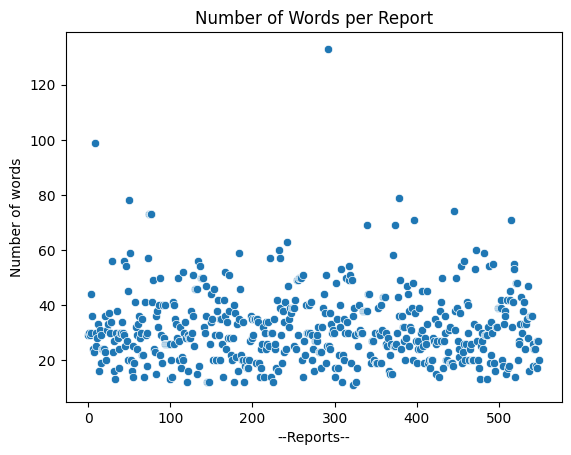

In [23]:
plt.title('Number of Words per Report')

sns.scatterplot(x=range(train.shape[0]), y=l)

plt.ylabel('Number of words')
plt.xlabel('--Reports--')

plt.show()

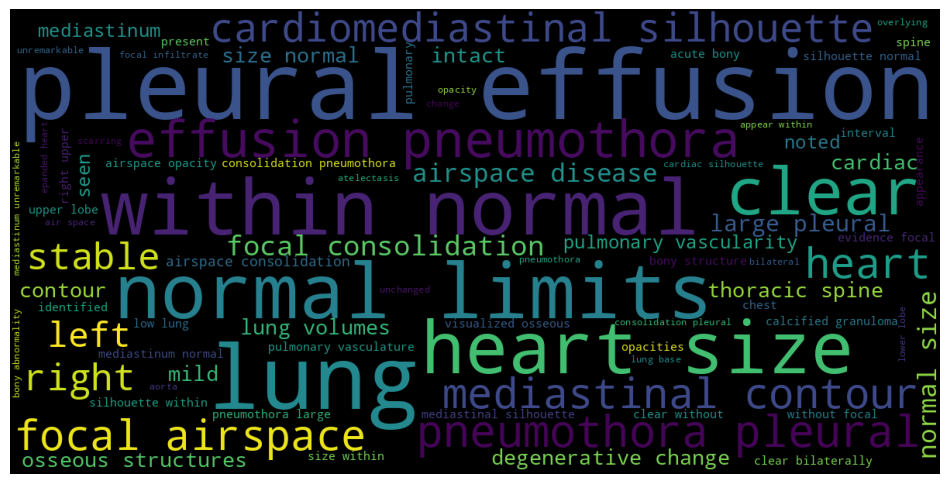

In [24]:
def showwordcloud(data, title = None):
    wordcloud = WordCloud(background_color='black',max_words=800,max_font_size=60,scale=3,random_state=1 ).generate(' '.join(data.astype(str)))

    fig = plt.figure(1, figsize=(12, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

showwordcloud(train['Report'])

<Axes: title={'center': 'Words For Each Findings Review'}, xlabel='Report'>

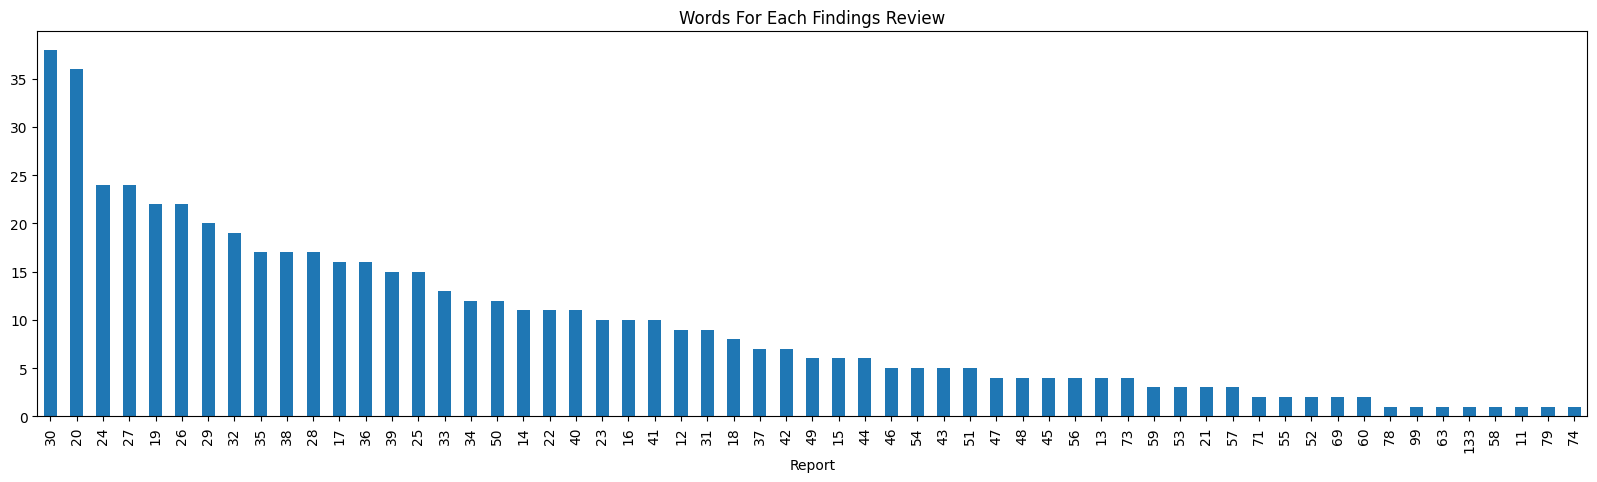

In [25]:
countword = train['Report'].str.split().apply(len).value_counts()
countword[:].plot(kind='bar',figsize=(20,5) , title = 'Words For Each Findings Review')

In [26]:
def remodelling(text):
    return 'startseq' + ' ' + text + ' ' + 'endseq'

train['Report'] = train['Report'].apply(lambda x : remodelling(x))
test['Report'] = test['Report'].apply(lambda x : remodelling(x))
validate['Report'] = validate['Report'].apply(lambda x : remodelling(x))

In [27]:
train.to_csv('/kaggle/working/Data/FinalTrainData.csv', index=False)
test.to_csv('/kaggle/working/Data/FinalTestData.csv', index=False)
validate.to_csv('/kaggle/working/Data/FinalValidateData.csv', index=False)

# **Report Generation**

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
from tensorflow.keras.layers import Dense, LSTM, Input, Embedding, Conv2D, Concatenate, Flatten, Add, Dropout, GRU
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Dropout, Input, Conv2D
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from nltk.translate.bleu_score import sentence_bleu
from tensorflow.keras.applications import densenet
from tensorflow.keras.models import Model
from skimage.transform import resize
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
import seaborn as sns
from PIL import Image
import urllib.request
import pandas as pd
import numpy as np
import datetime
import zipfile
import random
import pickle
import gdown
import time
import cv2
import os
import re

In [30]:
traindata = pd.read_csv('/kaggle/working/Data/FinalTrainData.csv')
testdata = pd.read_csv('/kaggle/working/Data/FinalTestData.csv')
validatedata = pd.read_csv('/kaggle/working/Data/FinalValidateData.csv')

In [31]:
ChexNet = densenet.DenseNet121(include_top=False, weights = None, input_shape=(224,224,3), pooling='avg')
X = ChexNet.output
X = Dense(14, activation='sigmoid', name='predictions')(X)
model = Model(inputs=ChexNet.input, outputs=X)

In [32]:
gdown.download('https://drive.google.com/u/0/uc?id=19BllaOvs2x5PLV_vlWMy4i8LapLb2j6b&export=download', quiet=True)

'brucechou1983_CheXNet_Keras_0.3.0_weights.h5'

In [33]:
model.load_weights('brucechou1983_CheXNet_Keras_0.3.0_weights.h5')

In [34]:
ChexNet = Model(inputs = model.input, outputs = model.layers[-2].output)

In [35]:
def loadimage(imgname):
    image = Image.open(imgname)
    X = np.asarray(image.convert('RGB'))
    X = np.asarray(X)
    X = preprocess_input(X)
    X = resize(X, (224,224,3))
    X = np.expand_dims(X, axis=0)
    X = np.asarray(X)
    return X

In [36]:
XnetFeatures = {}

for key, img1, img2, finding in tqdm(traindata.values):
    i1 = loadimage(img1)
    img1features = ChexNet.predict(i1, verbose=0)    
    i2 = loadimage(img2)
    img2features = ChexNet.predict(i2, verbose=0)
    Input_ = np.concatenate((img1features, img2features), axis=1)
    XnetFeatures[key] = Input_

for key, img1, img2, finding in tqdm(testdata.values):
    i1 = loadimage(img1)
    img1features = ChexNet.predict(i1, verbose=0)    
    i2 = loadimage(img2)
    img2features = ChexNet.predict(i2, verbose=0)
    Input_ = np.concatenate((img1features, img2features), axis=1)
    XnetFeatures[key] = Input_

for key, img1, img2, finding in tqdm(validatedata.values):
    i1 = loadimage(img1)
    img1features = ChexNet.predict(i1, verbose=0)    
    i2 = loadimage(img2)
    img2features = ChexNet.predict(i2, verbose=0)
    Input_ = np.concatenate((img1features, img2features), axis=1)
    XnetFeatures[key] = Input_

100%|██████████| 111/111 [00:20<00:00,  5.40it/s]


In [37]:
XTrain = traindata['Person_id']
XTest = testdata['Person_id']
XValidate = validatedata['Person_id']

YTrain = traindata['Report']
YTest =  testdata['Report']
YValidate =  validatedata['Report']

In [38]:
ChexNetFeatures = XnetFeatures

In [39]:
tokenizer = Tokenizer(filters='!"#$%&()*+,-/:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(YTrain.values)

In [40]:
padingsize = 153
vocabsize = len(tokenizer.word_index.keys()) + 1

In [41]:
urllib.request.urlretrieve('https://nlp.stanford.edu/data/glove.6B.zip', 'glovevector.zip')

('glovevector.zip', <http.client.HTTPMessage at 0x7a6600967e50>)

In [42]:
def unzipfile(zipfilepath, extractto):
    if not os.path.exists(extractto):
        os.makedirs(extractto)
    with zipfile.ZipFile(zipfilepath, 'r') as zipref:
        zipref.extractall(extractto)

unzipfile('/kaggle/working/glovevector.zip', '/kaggle/working/Glove-Vector')

In [43]:
glovefilepath = os.path.join('/kaggle/working/Glove-Vector/', 'glove.6B.300d.txt')  

In [44]:
glovevectors = {}

with open(glovefilepath, 'r', encoding='utf-8') as file:
    for line in file:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype='float32')
        glovevectors[word] = vector

In [45]:
embeddingmatrix = np.zeros((vocabsize,300))
for word, i in tokenizer.word_index.items():
    if word in glovevectors.keys():
        vec = glovevectors[word]
        embeddingmatrix[i] = vec
    else:
        continue

In [46]:
def loadimage(Id, report):
    imgfeature = ChexNetFeatures[Id.decode('utf-8')][0]
    return imgfeature, report

In [47]:
BatchSize = 12

In [48]:
def datasetgenerator(imgname, caption):
    dataset = tf.data.Dataset.from_tensor_slices((imgname, caption))
    dataset = dataset.map(lambda item1, item2: tf.numpy_function(loadimage, [item1, item2], [tf.float32, tf.string]), num_parallel_calls=tf.data.experimental.AUTOTUNE)
    dataset = dataset.shuffle(500).batch(BatchSize).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    
    return dataset

traingenerator = datasetgenerator(XTrain, YTrain)
validategenerator = datasetgenerator(XValidate, YValidate)

In [49]:
def bytestostring(arr):
    for i in range(len(arr)):
        arr[i] = arr[i].decode('utf-8')
    return arr

In [50]:
def convert(images, reports):
    imgs = []
    inreports = []
    outreports = []
    
    for i in range(len(images)):
        sequence = [tokenizer.word_index[e] for e in reports[i].split() if e in tokenizer.word_index.keys()]

        for j in range(1,len(sequence)):
            inseq = sequence[:j]
            outseq = sequence[j]
            outseq = tf.keras.utils.to_categorical(outseq, num_classes=vocabsize)

            imgs.append(images[i])
            inreports.append(inseq)
            outreports.append(outseq)
        
    return np.array(imgs), np.array(inreports), np.array(outreports)

In [51]:
input1 = Input(shape=(2048,), name='Image_Input')

dense1 = Dense(256, kernel_initializer=tf.keras.initializers.glorot_uniform(seed = 56), name='Dense_Encoder')(input1)

input2 = Input(shape=(153,), name='Text_Input')

embeddinglayer = Embedding(input_dim = vocabsize, output_dim = 300, input_length=153, mask_zero=True, trainable=False, weights=[embeddingmatrix], name='Embedding_Layer')
emb = embeddinglayer(input2)

LSTM1 = LSTM(units=256, activation='tanh', recurrent_activation='sigmoid', use_bias=True, kernel_initializer=tf.keras.initializers.glorot_uniform(seed=23),recurrent_initializer=tf.keras.initializers.orthogonal(seed=7),bias_initializer=tf.keras.initializers.zeros(), return_sequences=True, name='LSTM1')(emb)
LSTM2 = LSTM(units=256, activation='tanh', recurrent_activation='sigmoid', use_bias=True,kernel_initializer=tf.keras.initializers.glorot_uniform(seed=23),recurrent_initializer=tf.keras.initializers.orthogonal(seed=7), bias_initializer=tf.keras.initializers.zeros(), name='LSTM2')
LSTM2output = LSTM2(LSTM1)

dropout1 = Dropout(0.5, name='Dropout1')(LSTM2output)

dec =  tf.keras.layers.Add()([dense1, dropout1])

fc1 = Dense(256, activation='relu', kernel_initializer=tf.keras.initializers.he_normal(seed = 63), name='FC1')
fc1output = fc1(dec)

dropout2 = Dropout(0.4, name='Dropout2')(fc1output)
outputlayer = Dense(vocabsize, activation='softmax', name='Output_Layer')
output = outputlayer(dropout2)

encoderdecoder = Model(inputs = [input1, input2], outputs = output)

In [52]:
lossfunction = tf.keras.losses.CategoricalCrossentropy(from_logits=False, reduction='sum')

In [53]:
def maskedloss(YTrue, YPred):
    mask = tf.math.logical_not(tf.math.equal(YTrue, 0))
    Loss = lossfunction(YTrue, YPred)
    mask = tf.cast(mask, dtype=Loss.dtype)
    Loss = Loss*mask
    Loss = tf.reduce_mean(Loss)
    return Loss

In [54]:
optimizer = tf.keras.optimizers.Adam(0.001)
encoderdecoder.compile(optimizer, loss = maskedloss)

In [55]:
currenttime = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
trainlogdir = 'Tensorboard/logs_m1/fit3/' + currenttime + '/train'
vallogdir = 'Tensorboard/logs_m1/fit3/' + currenttime + '/test'
trainsummarywriter = tf.summary.create_file_writer(trainlogdir)
valsummarywriter = tf.summary.create_file_writer(vallogdir)

In [56]:
epochtrainloss = []
epochvalloss = []

for epoch in range(17):
    print('EPOCH : ',epoch + 1)
    
    start = time.time()
    batchlosstrain = 0
    batchlossval = 0
    
    for img, report in traingenerator:
       
        R1 = bytestostring(report.numpy()) 
        imginput, repinput, outputword = convert(img.numpy(), R1)
        repinput = pad_sequences(repinput, maxlen=153, padding='post')
        results = encoderdecoder.train_on_batch([imginput, repinput], outputword)
        
        batchlosstrain += results

    trainloss = batchlosstrain/(XTrain.shape[0]//14)

    with trainsummarywriter.as_default():
        tf.summary.scalar('loss', trainloss, step = epoch)
    
    for img, report in validategenerator:
        
        R1 = bytestostring(report.numpy())
        imginput, repinput, outputword = convert(img.numpy(), R1)
        repinput = pad_sequences(repinput, maxlen=153, padding='post')
        results = encoderdecoder.test_on_batch([imginput, repinput], outputword)
        
        batchlossval += results
    
    valloss = batchlossval/(XValidate.shape[0]//14)
    
    with valsummarywriter.as_default():
        tf.summary.scalar('loss', valloss, step = epoch)

    epochtrainloss.append(trainloss)
    epochvalloss.append(valloss)
    
    print('Training Loss: {},  Val Loss: {}'.format(trainloss, valloss))
    print('Time Taken for This Epoch : {} sec'.format(time.time()-start))   
    encoderdecoder.save_weights('encoder_decoder_epoch_'+ str(epoch+1) + '.weights.h5')
    print('--------------------------------------------------------------------------------------------')

    tf.keras.backend.clear_session()

EPOCH :  1
Training Loss: 3.112781598017766,  Val Loss: 3.503664118903024
Time Taken for This Epoch : 45.45505332946777 sec
--------------------------------------------------------------------------------------------
EPOCH :  2
Training Loss: 2.7748480087671523,  Val Loss: 3.2714706829616
Time Taken for This Epoch : 42.41358685493469 sec
--------------------------------------------------------------------------------------------
EPOCH :  3
Training Loss: 2.632494730827136,  Val Loss: 3.08443444115775
Time Taken for This Epoch : 42.63699173927307 sec
--------------------------------------------------------------------------------------------
EPOCH :  4
Training Loss: 2.4680938965235,  Val Loss: 2.912452902112688
Time Taken for This Epoch : 43.22070097923279 sec
--------------------------------------------------------------------------------------------
EPOCH :  5
Training Loss: 2.3430780478012867,  Val Loss: 2.7705158846718922
Time Taken for This Epoch : 43.661455154418945 sec
---------

Text(0.5, 1.0, 'Loss Per Epoch')

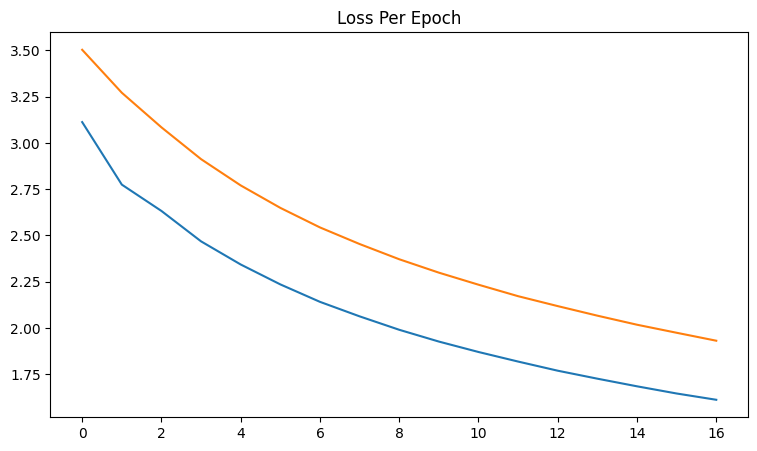

In [57]:
plt.figure(figsize=(9,5))

plt.plot(epochtrainloss)
plt.plot(epochvalloss)

plt.title('Loss Per Epoch')

In [58]:
encoderdecoder.load_weights('/kaggle/working/encoder_decoder_epoch_5.weights.h5')

In [59]:
encoderinput = encoderdecoder.input[0]
encoderoutput = encoderdecoder.get_layer('Dense_Encoder').output
encodermodel = Model(encoderinput, encoderoutput)
textinput = encoderdecoder.input[1]
encoutput = Input(shape=(256,), name='Enc_Output')
textoutput = encoderdecoder.get_layer('LSTM2').output
Add1 = tf.keras.layers.Add()([textoutput, encoutput])
fc01 = fc1(Add1)
decoderoutput = outputlayer(fc01)
decodermodel = Model(inputs = [textinput, encoutput], outputs = decoderoutput)

In [60]:
def greedysearch(img):
    image = ChexNetFeatures[img]
    input_ = 'startseq'
    imagefeatures = encodermodel.predict(image, verbose=0)
    result = []
    for i in range(153):
        inputtok = [tokenizer.word_index[w] for w in input_.split()]
        inputpadded = pad_sequences([inputtok], 153, padding='post')
        predictions = decodermodel.predict([inputpadded, imagefeatures], verbose = 0)
        arg = np.argmax(predictions)
        if arg != 7:
            result.append(tokenizer.index_word[arg])
            input_ = input_ + ' ' + tokenizer.index_word[arg]
        else:
            break
    rep = ' '.join(e for e in result)
    return rep

In [61]:
def loadimage(imgname):
    image = Image.open(imgname)
    X = np.asarray(image.convert('RGB'))
    X = np.asarray(X)
    X = preprocess_input(X)
    X = resize(X, (224,224,3))
    X = np.expand_dims(X, axis=0)
    X = np.asarray(X)
    return X

In [62]:
def getresult(idx=0):
    
    plt.figure(figsize=(9,5))
    
    PreReport = greedysearch(testdata['Person_id'][idx])
    ActReport = testdata['Report'][idx].split()
    ActReport.remove(ActReport[0])
    ActReport.remove(ActReport[len(ActReport)-1])
    ActReport = ' '.join(ActReport)
    
    print('------------------------------------------------------------------------------------------------------')
    print('Predicted Report : ',PreReport)
    print('------------------------------------------------------------------------------------------------------')
    print('Actual Report : ',ActReport)
    
    plt.subplot(121)
    img = loadimage(testdata['Image1'][idx])
    plt.imshow(img[0])
    
    plt.subplot(122)
    img = loadimage(testdata['Image2'][idx])
    plt.imshow(img[0])

------------------------------------------------------------------------------------------------------
Predicted Report :  the heart size
------------------------------------------------------------------------------------------------------
Actual Report :  the heart size and pulmonary vascularity appear within normal limits . the lungs are free focal airspace disease . no pleural effusion pneumothora seen . calcified lymph are present . degenerative changes are present the spine .


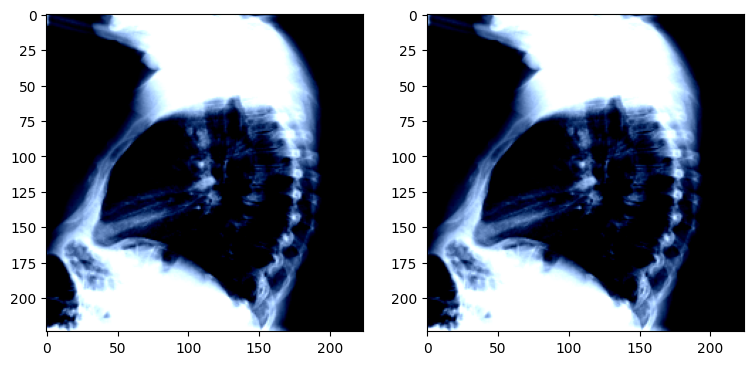

In [63]:
getresult(20)

In [64]:
def removefullstops(text):
    punctuations = '''.'''
    newtext = []
    for char in text:
        if char in punctuations: 
            text = text.replace(char, '')
    newtext.append(' '.join(e for e in text.split()))
    return newtext[0]

In [65]:
Bleu1 = []
Bleu2 = []
Bleu3 = []
Bleu4 = []
for img, rep in tqdm(zip(XValidate.values, YValidate.values)):
    
    rep = removefullstops(rep)
    rep = rep.split()[1:]
    rep = rep[:len(rep)-1]
    rep = ' '.join(e for e in rep)
    
    PredictedRep = greedysearch(img)
    PredictedRep = removefullstops(PredictedRep)
    
    Bleu1.append(sentence_bleu([rep.split()], PredictedRep.split(), weights = (1,0,0,0)))
    Bleu2.append(sentence_bleu([rep.split()], PredictedRep.split(), weights = (0.5,0.5,0,0)))
    Bleu3.append(sentence_bleu([rep.split()], PredictedRep.split(), weights = (0.33,0.33,0.33,0)))
    Bleu4.append(sentence_bleu([rep.split()], PredictedRep.split(), weights = (0.25,0.25,0.25,0.25)))

111it [00:33,  3.28it/s]


In [66]:
B1 = sum(Bleu1)/XValidate.shape[0]
B2 = sum(Bleu2)/XValidate.shape[0]
B3 = sum(Bleu3)/XValidate.shape[0]
B4 = sum(Bleu4)/XValidate.shape[0]

print('Bleu1 Score: ',B1)
print('Bleu2 Score: ',B2)
print('Bleu3 Score: ',B3)
print('Bleu4 Score: ',B4)

print('-----------------------------------------------------------------------')
print('Avg Validate Blue Score:',(B1+B2+B3+B4)/4)

Bleu1 Score:  0.0058944507158646495
Bleu2 Score:  0.00543453093245276
Bleu3 Score:  0.006551060854486151
Bleu4 Score:  0.007177252229642005
-----------------------------------------------------------------------
Avg Validate Blue Score: 0.006264323683111392


In [67]:
Bleu1 = []
Bleu2 = []
Bleu3 = []
Bleu4 = []
for img, rep in tqdm(zip(XTest.values, YTest.values)):
    
    rep = removefullstops(rep)
    rep = rep.split()[1:]
    rep = rep[:len(rep)-1]
    rep = ' '.join(e for e in rep)
    
    PredictedRep = greedysearch(img)
    PredictedRep = removefullstops(PredictedRep)
    
    Bleu1.append(sentence_bleu([rep.split()], PredictedRep.split(), weights = (1,0,0,0)))
    Bleu2.append(sentence_bleu([rep.split()], PredictedRep.split(), weights = (0.5,0.5,0,0)))
    Bleu3.append(sentence_bleu([rep.split()], PredictedRep.split(), weights = (0.33,0.33,0.33,0)))
    Bleu4.append(sentence_bleu([rep.split()], PredictedRep.split(), weights = (0.25,0.25,0.25,0.25)))

186it [00:56,  3.30it/s]


In [68]:
B1 = sum(Bleu1)/XTest.shape[0]
B2 = sum(Bleu2)/XTest.shape[0]
B3 = sum(Bleu3)/XTest.shape[0]
B4 = sum(Bleu4)/XTest.shape[0]

print('Bleu1 Score: ',B1)
print('Bleu2 Score: ',B2)
print('Bleu3 Score: ',B3)
print('Bleu4 Score: ',B4)

print('-----------------------------------------------------------------------')
print('Avg Test Blue Score:',(B1+B2+B3+B4)/4)

Bleu1 Score:  0.007623108873951831
Bleu2 Score:  0.006123014657008857
Bleu3 Score:  0.00786526795303612
Bleu4 Score:  0.008902987330872462
-----------------------------------------------------------------------
Avg Test Blue Score: 0.007628594703717318
